You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%202-%20Setting%20up%20DF%20environment/module2_ts_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series basics in python

## Introduction 

In this notebook, we will explore the basics of time series analysis using Python. We will be using two datasets:

1. The airline passenger dataset, which records the monthly number of passengers from 1949 to 1960.
2. The AAPL stock dataset, which we will obtain using the yfinance library.

## Importing libraries
In this notebook, we will be using PyCaret, a powerful library that integrates several essential tools and libraries for time series analysis. To ensure a smooth setup, I highly recommend setting up PyCaret in a separate environment. This helps in managing dependencies and avoiding conflicts with other projects. For detailed instructions on setting up PyCaret, you can refer to my YouTube playlist for PyCaret.
https://www.youtube.com/playlist?list=PL2GWo47BFyUOqCAj_16yeNspfeM0nfA6q


If you are using Google Colab, make sure to install PyCaret as well. For this notebook, we will use the light version of PyCaret, which includes the necessary functionalities for our analysis.

https://pycaret.gitbook.io/docs/get-started/installation

In [66]:
# Run this cell only if you are using Google Colab
# If you are running on your local Jupyter notebook, do not run this cell
# !pip install pycaret
# !pip install yfinance

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [68]:
import warnings
warnings.filterwarnings('ignore')

## Importing datasets

In [69]:
airpass = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv")
airpass.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [70]:
aapl = yf.download('AAPL', start='2022-01-01',end='2024-05-01')
aapl.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481110,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489624,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610199,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777863,86709100


In [71]:
aapl_close = aapl[['Close']]
aapl_close.head()

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


The AAPL stock data fetched using **yfinance** is already in the correct format with the 'Date' column set as the index.

**Ensuring the Time Index is Correct**

After importing the datasets, we need to make sure the time index is correctly set to a datetime format. This is essential for performing time series analysis, as the datetime index allows us to leverage pandas' powerful time series functionalities.

In [72]:
# Convert the 'Month' column to datetime format
airpass['Month'] = pd.to_datetime(airpass['Month'])

# Set the 'Month' column as the index
airpass.set_index('Month', inplace=True)

# Display the first few rows to confirm the changes
airpass.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [73]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Data Exploration 

Now that our time index is correctly set, we can proceed with exploring the datasets. This includes checking for any missing values and understanding the basic structure and statistics of our data.

In [74]:
# Check for missing values in both datasets
print("Missing values in Airline Passengers Data:")
print(airpass.isnull().sum())

print("\nMissing values in AAPL Stock Data:")
print(aapl_close.isnull().sum())


Missing values in Airline Passengers Data:
Passengers    0
dtype: int64

Missing values in AAPL Stock Data:
Close    0
dtype: int64


In [75]:
# Display the summary statistics of both datasets
print("\nSummary statistics for Airline Passengers Data:")
print(airpass.describe())
print(airpass.info())

print("\nSummary statistics for AAPL Stock Data:")
print(aapl_close.describe())
print(aapl_close.info())



Summary statistics for Airline Passengers Data:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Summary statistics for AAPL Stock Data:
            Close
count  584.000000
mean   165.794178
std     17.494379
min    125.019997
25%    151.024998
50%    168.470001
75%    178.625000
max    198.110001
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 2022-01-03 to 2024-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   584 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB
None


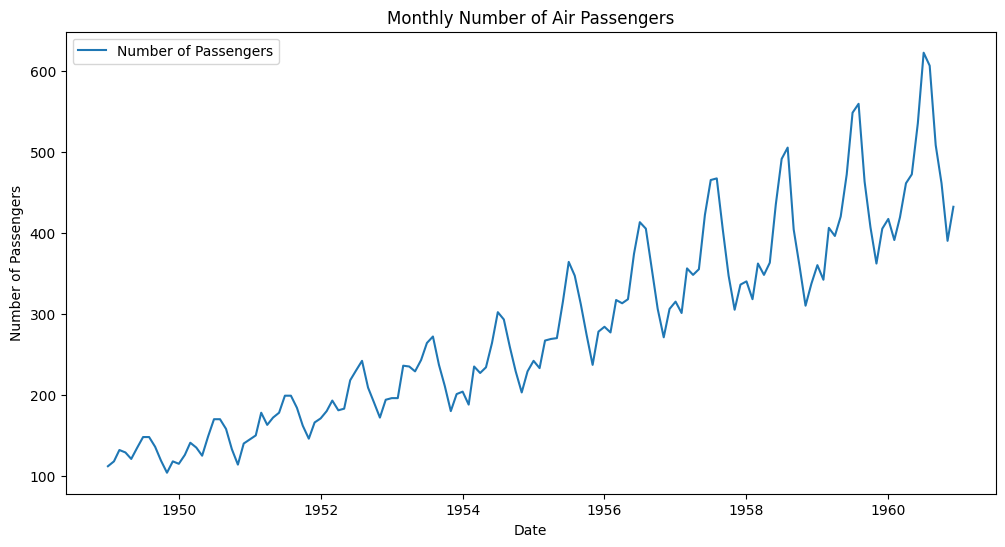

In [76]:
# Plot the airline passengers time series data
plt.figure(figsize=(12, 6))
plt.plot(airpass, label='Number of Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


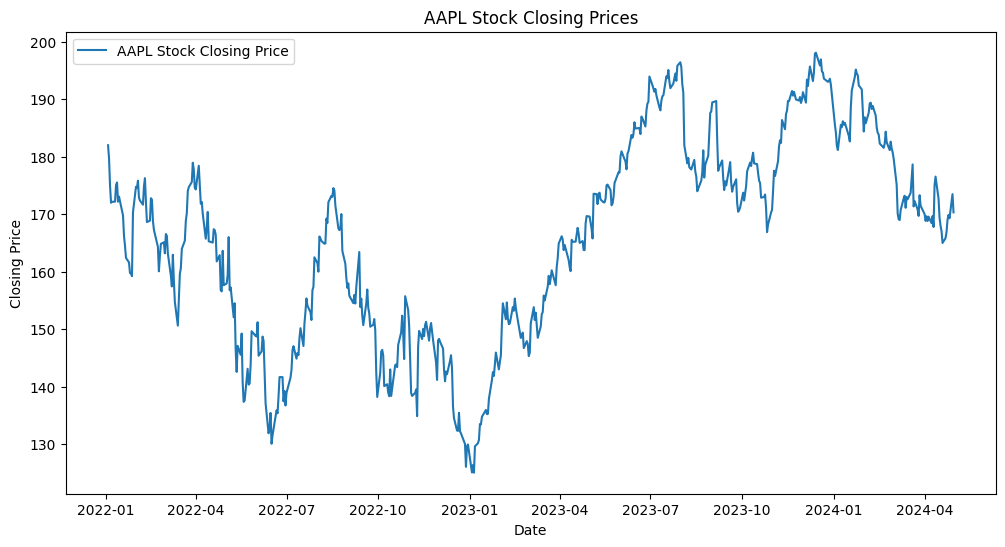

In [77]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## Data transformation 

To simplify the patterns in the historical data and make them more consistent across the entire dataset, we will apply various mathematical transformations to the airline passenger data. Transformations can help in stabilizing the variance and making the data more suitable for modeling. 

However, it's important to note that these transformations can significantly alter the interpretation of the data, so they should be used with caution. We will try multiple transformations and compare the results to determine which is most appropriate for our data.

### Logorithmic Transformation

The logarithmic transformation helps in stabilizing the variance of the time series data, particularly when the data spans several orders of magnitude.

            Passengers  Log_Passengers
Month                                 
1949-01-01         112        4.718499
1949-02-01         118        4.770685
1949-03-01         132        4.882802
1949-04-01         129        4.859812
1949-05-01         121        4.795791


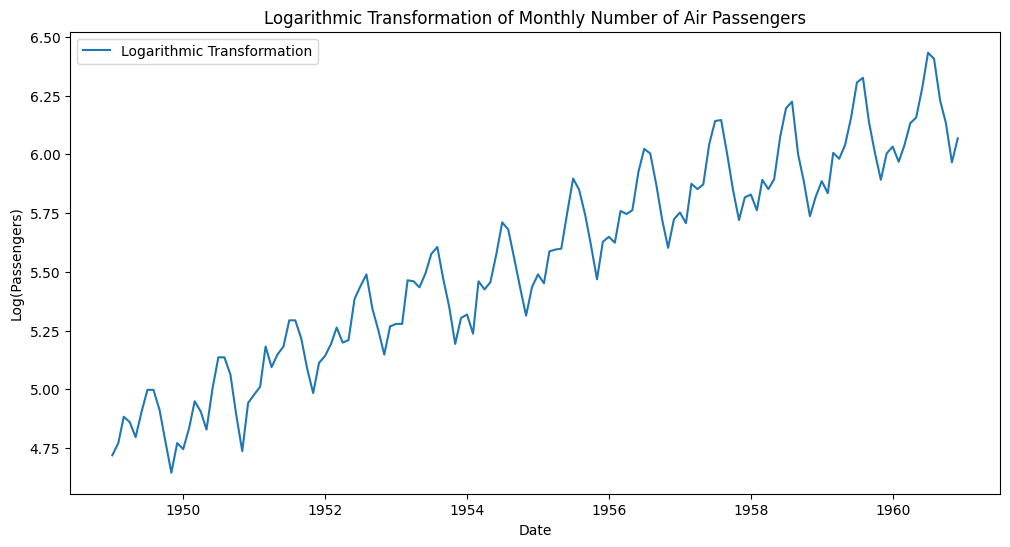

In [78]:
# Apply logarithmic transformation
airpass['Log_Passengers'] = np.log(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass['Log_Passengers'], label='Logarithmic Transformation')
plt.title('Logarithmic Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Log(Passengers)')
plt.legend()
plt.show()

### Power transformation 
A power transformation, such as the square root transformation, can also help in stabilizing the variance and making the data more normally distributed.

            Passengers  Log_Passengers  Sqrt_Passengers
Month                                                  
1949-01-01         112        4.718499        10.583005
1949-02-01         118        4.770685        10.862780
1949-03-01         132        4.882802        11.489125
1949-04-01         129        4.859812        11.357817
1949-05-01         121        4.795791        11.000000


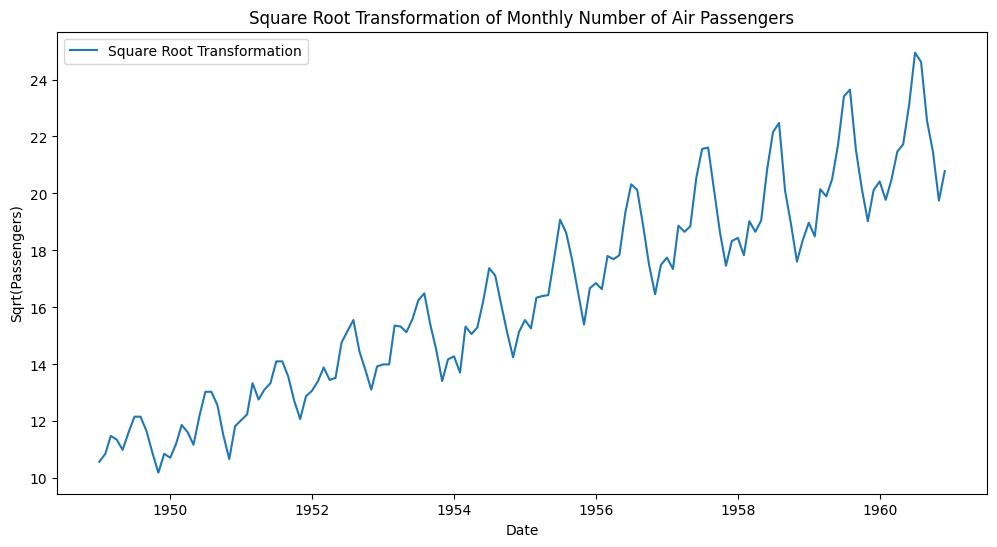

In [79]:
# Apply square root transformation
airpass['Sqrt_Passengers'] = np.sqrt(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass['Sqrt_Passengers'], label='Square Root Transformation')
plt.title('Square Root Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Sqrt(Passengers)')
plt.legend()
plt.show()

### Box-Cox Transformation

The Box-Cox transformation is a more flexible transformation that can handle a wide range of data distributions. It requires all values to be positive, which our dataset already satisfies.


The Box-Cox transformation is defined as:

$ y(\lambda) = 
\begin{cases} 
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(y) & \text{if } \lambda = 0 
\end{cases}
$

Where:
- $( y )$ is the original data.
- $( \lambda )$ is the transformation parameter.


the Transformation parameter detemines the nature of the transformation: 
- $\lambda = 1$  No transformation (the data remains unchanged).
- $\lambda = 0$  Logarithmic transformation.
- $\lambda = 0.5$  Square root transformation.

- Optimized $\lambda$ : The scipy.stats package provides a method to find the optimal value of 
$\lambda$ that maximizes the log-likelihood function of the transformed data.  This means that the transformed data is as close to normally distributed as possible, with stabilized variance. This is done using the boxcox function, which returns both the transformed data and the optimal $\lambda$

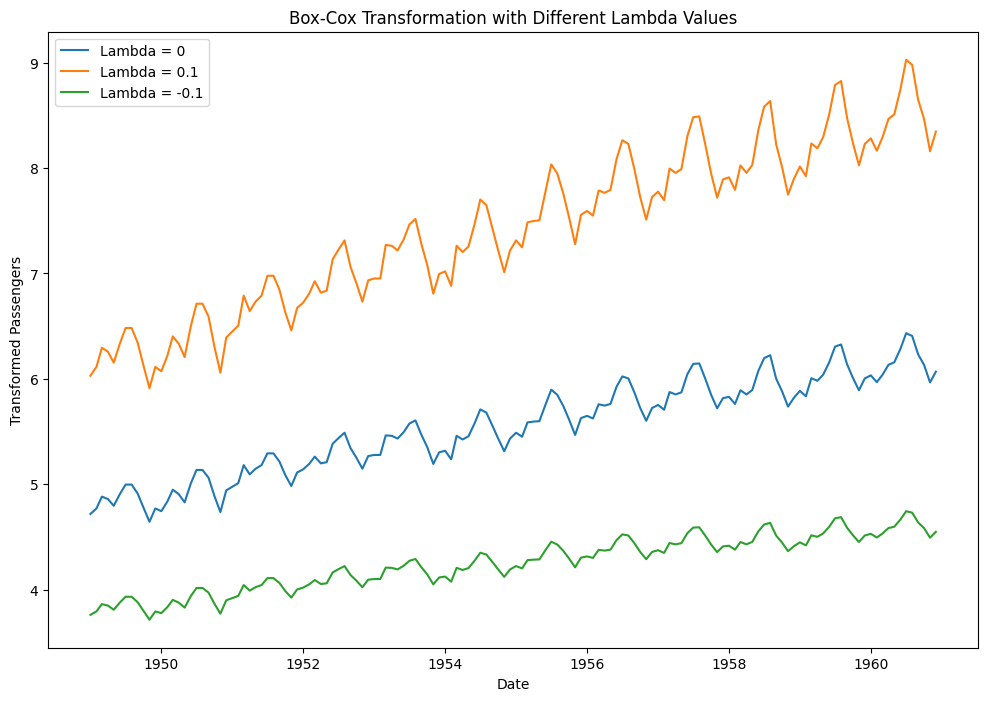

In [95]:
# Let's start by defining our own boxcox transformation function 

def boxcox_transform_and_plot(data, lambda_values):
    """
    Apply Box-Cox transformation to the data for different lambda values and plot the results.
    
    Parameters:
    data (pd.Series): The input time series data.
    lambda_values (list): A list of lambda values for the Box-Cox transformation.
    """
    plt.figure(figsize=(12, 8))
    
    for lmbda in lambda_values:
        if lmbda == 0:
            transformed_data = np.log(data)
        else:
            transformed_data = (data**lmbda - 1) / lmbda
        
        plt.plot(data.index, transformed_data, label=f'Lambda = {lmbda}')
    
    plt.title('Box-Cox Transformation with Different Lambda Values')
    plt.xlabel('Date')
    plt.ylabel('Transformed Passengers')
    plt.legend()
    plt.show()

# List of lambda values to visualize
lambda_values = [0, 0.1, -0.1] # you can try 1 to get the original data. 

# Apply the function to the airline passenger data
boxcox_transform_and_plot(airpass['Passengers'], lambda_values)

In [96]:
from scipy.stats import boxcox

            Passengers  Log_Passengers  Sqrt_Passengers  boxcox_Passengers
Month                                                                     
1949-01-01         112        4.718499        10.583005           6.827490
1949-02-01         118        4.770685        10.862780           6.932822
1949-03-01         132        4.882802        11.489125           7.161892
1949-04-01         129        4.859812        11.357817           7.114611
1949-05-01         121        4.795791        11.000000           6.983787


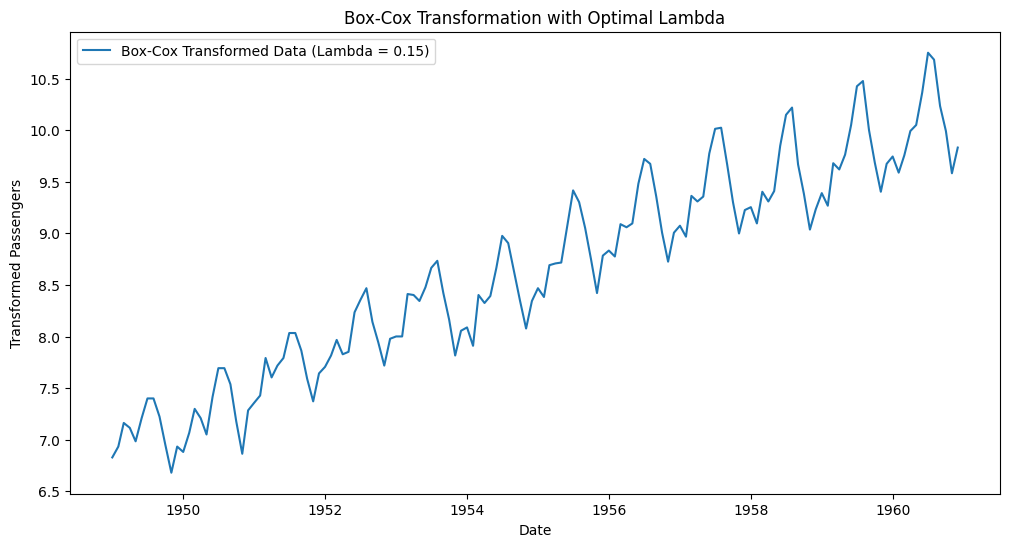

The optimal lambda for Box-Cox transformation is: 0.14802265137037945


In [97]:
# Apply Box-Cox transformation to find the optimal lambda
airpass['boxcox_Passengers'] , optimal_lambda = boxcox(airpass.Passengers)
print(airpass.head())

# Plot the transformed data with optimal lambda
plt.figure(figsize=(12, 6))
plt.plot( airpass['boxcox_Passengers'] , label=f'Box-Cox Transformed Data (Lambda = {optimal_lambda:.2f})')
plt.title('Box-Cox Transformation with Optimal Lambda')
plt.xlabel('Date')
plt.ylabel('Transformed Passengers')
plt.legend()
plt.show()

# Print the optimal lambda
print(f'The optimal lambda for Box-Cox transformation is: {optimal_lambda}')


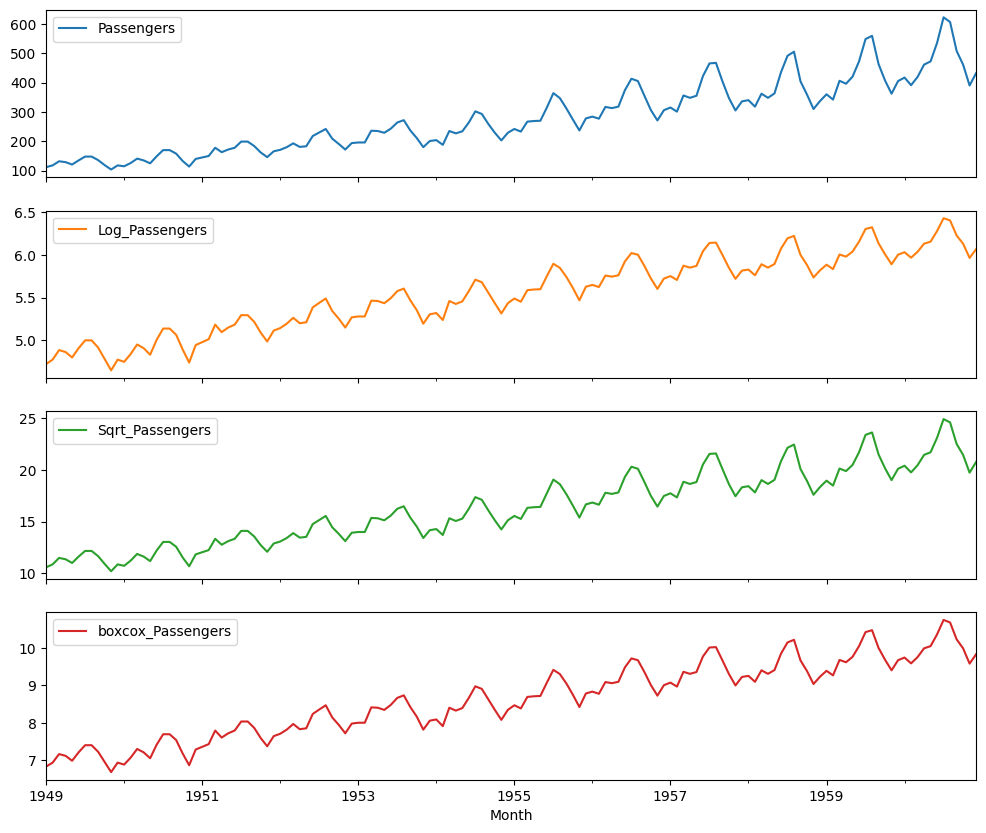

In [86]:
airpass.plot(subplots=True, figsize=(12,10))
plt.show()

**Summary**: Data transformation can enhance model performance and stability by:
- Stabilizing Variance: Reduces the impact of outliers and makes patterns more consistent.
- Improving Convergence: Especially in deep learning, normalized data speeds up training and leads to better results.
- Not Mandatory for Non-Parametric Models: While beneficial, transformations are not always required for non-parametric models like decision trees.


## ACF and PACF

* ACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

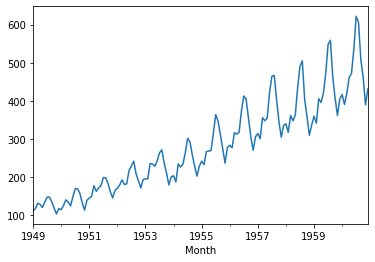

In [18]:
airpass.Passengers.plot()
plt.show()

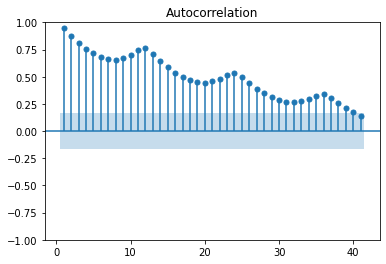

In [19]:
plot_acf(airpass.Passengers, lags = 41, zero=False, alpha=0.05, bartlett_confint=False)
plt.show()

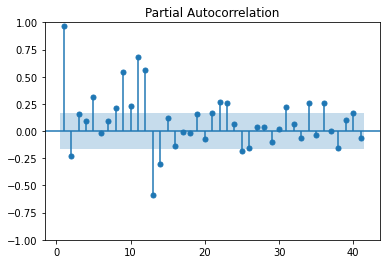

In [20]:
plot_pacf(airpass.boxcox_pass, lags = 41, zero = False,alpha=0.05, method='ols')
plt.show()

## Seasonal Decomposition: 

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

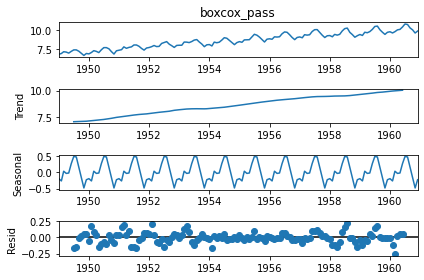

In [22]:
result = seasonal_decompose(airpass.boxcox_pass, model='additive')  
result.plot();
plt.show()

## White Noise: 


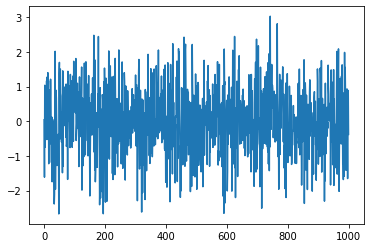

In [23]:
wn = np.random.randn(1000)
plt.plot(wn)
plt.show()


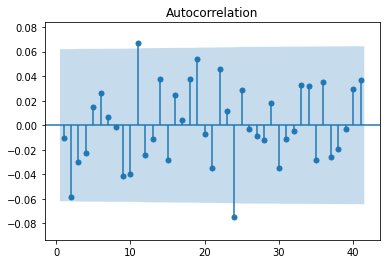

In [24]:
plot_acf(wn, lags = 41, zero=False, alpha=0.05 , auto_ylims=True)
plt.show()

## Random Walk: 


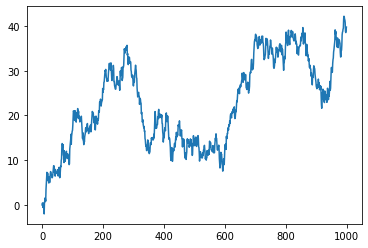

In [25]:
rw = np.zeros(1000)

for i in range(1,1000):
    rw[i] = rw[i-1]+ np.random.randn()
    
plt.plot(rw)
plt.show()

## Forecasting benchmarks

In [14]:
aapl['MA30']= aapl['Adj Close'].rolling(30).mean()
aapl

,Adj Close,MA30
Date,,
2021-01-04 00:00:00-05:00,127.874969,NaN
2021-01-05 00:00:00-05:00,129.455948,NaN
2021-01-06 00:00:00-05:00,125.098282,NaN
2021-01-07 00:00:00-05:00,129.367035,NaN
2021-01-08 00:00:00-05:00,130.483658,NaN
...,...,...
2023-01-13 00:00:00-05:00,134.759995,135.467333
2023-01-17 00:00:00-05:00,135.940002,135.055000
2023-01-18 00:00:00-05:00,135.210007,134.635000


<Figure size 864x720 with 0 Axes>

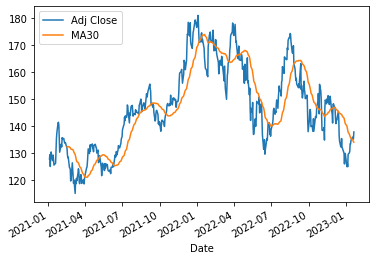

In [16]:
plt.figure(figsize=(12,10))
aapl.plot()
plt.show()

In [17]:
aapl.isna()

,Adj Close,MA30
Date,,
2021-01-04 00:00:00-05:00,False,True
2021-01-05 00:00:00-05:00,False,True
2021-01-06 00:00:00-05:00,False,True
2021-01-07 00:00:00-05:00,False,True
2021-01-08 00:00:00-05:00,False,True
...,...,...
2023-01-13 00:00:00-05:00,False,False
2023-01-17 00:00:00-05:00,False,False
2023-01-18 00:00:00-05:00,False,False


In [18]:
# Filling the NA's
aapl['MA30']= aapl['MA30'].fillna(method = 'bfill')
# ffill =  this is front filling meaning that using last price for missing value
# bfill =  this is back filling meaning that using next price for missing values

<Figure size 864x720 with 0 Axes>

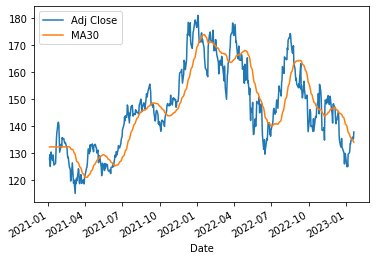

In [19]:
plt.figure(figsize=(12,10))
aapl.plot()
plt.show()

In [20]:
# let's split the data intor train and test
len(aapl)

516

In [21]:
train = aapl[0:456]
test = aapl[456:]

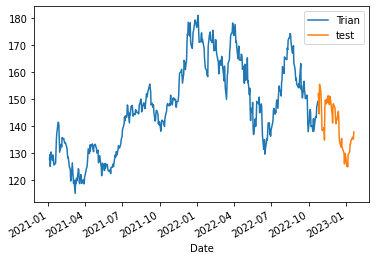

In [22]:
train['Adj Close'].plot(legend = True, label='Trian')
test['Adj Close'].plot(legend = True, label='test')
plt.show()



In [23]:
aapl

,Adj Close,MA30
Date,,
2021-01-04 00:00:00-05:00,127.874969,132.355749
2021-01-05 00:00:00-05:00,129.455948,132.355749
2021-01-06 00:00:00-05:00,125.098282,132.355749
2021-01-07 00:00:00-05:00,129.367035,132.355749
2021-01-08 00:00:00-05:00,130.483658,132.355749
...,...,...
2023-01-13 00:00:00-05:00,134.759995,135.467333
2023-01-17 00:00:00-05:00,135.940002,135.055000
2023-01-18 00:00:00-05:00,135.210007,134.635000


In [24]:
# Let's add some forecast benchmarks
test['naive forecast'] = test['Adj Close'].shift(1)
test['mean forecast'] = test['Adj Close'].mean()
test.head()

,Adj Close,MA30,naive forecast,mean forecast
Date,,,,
2022-10-25 00:00:00-04:00,152.087708,146.482004,NaN,140.410316
2022-10-26 00:00:00-04:00,149.102661,146.283666,152.087708,140.410316
2022-10-27 00:00:00-04:00,144.560196,146.031752,149.102661,140.410316
2022-10-28 00:00:00-04:00,155.482086,146.199474,144.560196,140.410316
2022-10-31 00:00:00-04:00,153.086044,146.161537,155.482086,140.410316


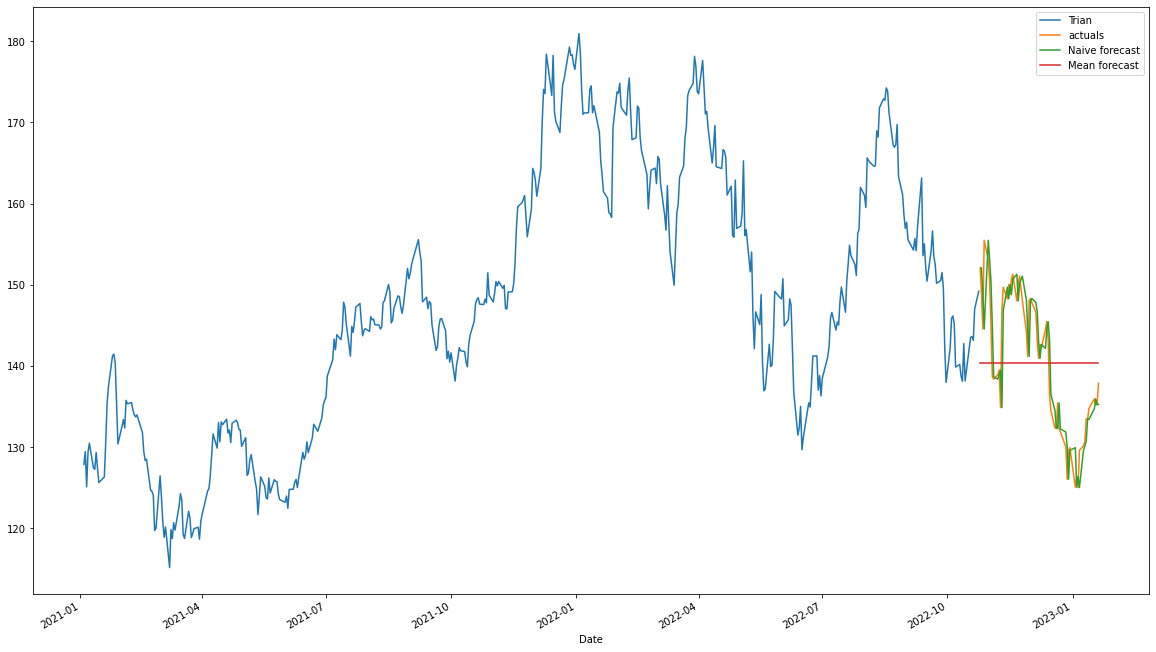

In [27]:
plt.figure(figsize=(20,12))

train['Adj Close'].plot(legend = True, label='Trian')
test['Adj Close'].plot(legend = True, label='actuals')
test['naive forecast'].plot(legend = True, label='Naive forecast')
test['mean forecast'].plot(legend = True, label='Mean forecast')

plt.show()


### Log returns



In [2]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()